# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from workflow.preprocessing import preprocess
from workflow.model import init_model, compile_model, fit_model, evaluate_model, predict
from workflow.model_evaluation import train_test_split, get_X_y, cross_validate

2022-12-04 21:20:01.851292: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data

In [3]:
PA75016_df = pd.read_csv("../../data/pollution/2_Processed/PA75016.csv").copy()
PA75016_df

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
0,2018/01/01 01:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
1,2018/01/01 02:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
2,2018/01/01 03:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
3,2018/01/01 04:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
4,2018/01/01 05:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
42571,2022/11/14 20:00:00+00,14.5,18.8,41.5,NaN,NaN,75016 - Porte Auteuil,Traffic
42572,2022/11/14 21:00:00+00,NaN,NaN,34.5,NaN,NaN,75016 - Porte Auteuil,Traffic
42573,2022/11/14 22:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
42574,2022/11/14 23:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic


In [4]:
df = preprocess(PA75016_df)
df

You have dropped O3 with 100.0% of NA
You have dropped SO2 with 40.2% of NA
DataFrame is processed, you can play with it !


,PM25,PM10,NO2,ATMO,sin_Month,cos_Month,sin_day,cos_day,confinement,Pollution_peak
Date_time,,,,,,,,,,
2018-01-01,-0.001422,-0.048074,-0.840686,0,0.000000,1.0,-0.781831,0.623490,0,0
2018-01-02,-0.001422,-0.048074,-0.840686,0,0.000000,1.0,0.000000,1.000000,0,0
2018-01-03,-0.001422,-0.048074,-0.840686,0,0.000000,1.0,0.781831,0.623490,0,0
2018-01-04,-0.001422,-0.048074,-0.840686,0,0.000000,1.0,0.974928,-0.222521,0,0
2018-01-05,-0.025605,-0.131895,-0.840686,0,0.000000,1.0,0.433884,-0.900969,0,0
...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.504979,-0.603390,-0.507353,0,-0.866025,0.5,0.781831,0.623490,0,0
2022-11-10,0.012802,-0.389522,-0.465686,0,-0.866025,0.5,0.974928,-0.222521,0,0
2022-11-11,-0.315789,-0.951002,-1.296569,0,-0.866025,0.5,0.433884,-0.900969,0,0


In [5]:
df['ATMO'].value_counts()

1    675
2    626
0    461
3     13
Name: ATMO, dtype: int64

# Cross-validate

Folds shape: (7, 521, 10)
The function generated 7 folds.
Each fold has a shape equal to (521, 10).


Fold n°1
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------


2022-12-04 21:20:24.139649: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


fit_model executed in 30.93 seconds, using up to 21.42MB of RAM


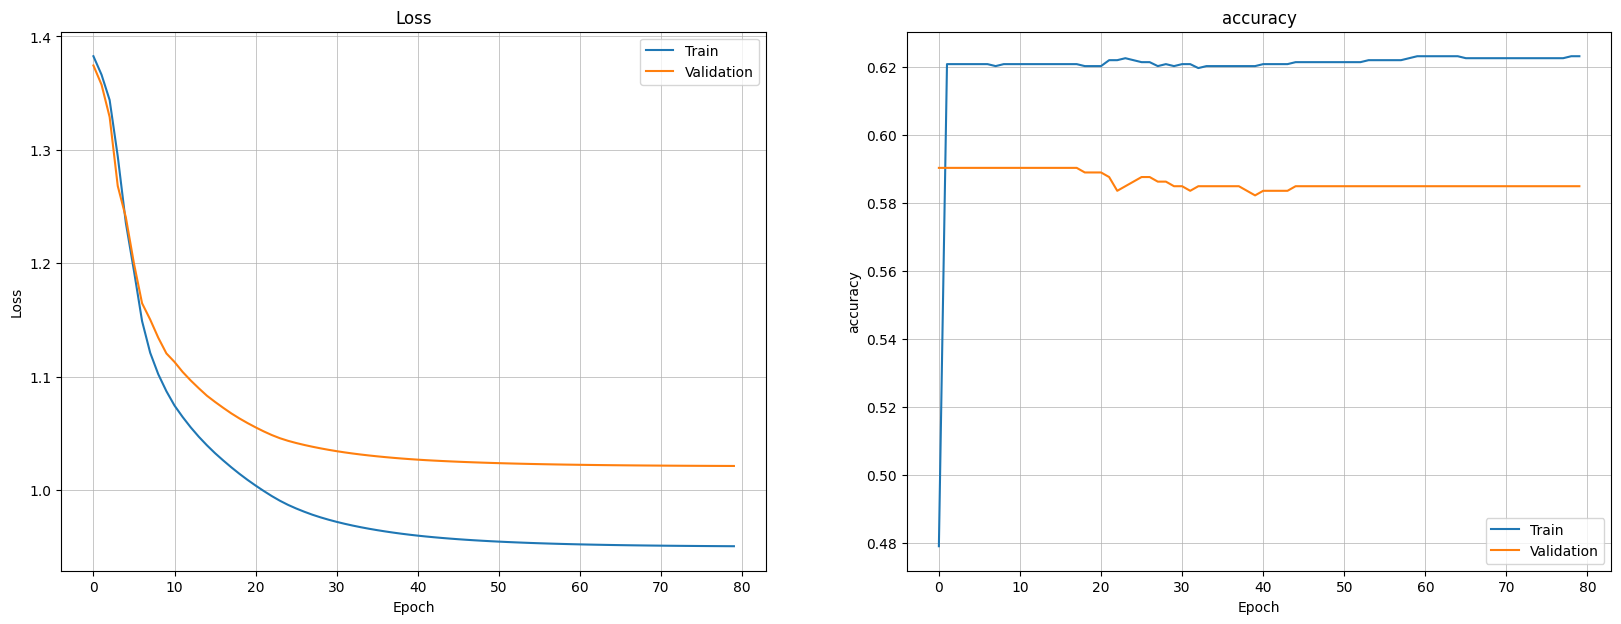

5/5 [==============================] - 0s 7ms/step - loss: 1.1143 - accuracy: 0.6200
✅ Model evaluated: loss 1.11 accuracy 0.62


Accuracy baseline fold n°1 = 0.38
Accuracy LSTM fold n°1 = 0.62
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: 61.11 % 

Fold n°2
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x12dfb88b0>
Traceback (most recent call last):
  File "/Users/llm/.pyenv/versions/3.10.6/lib/python3.10/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 

KeyboardInterrupt



In [6]:
cross_validate(df)

# Model training

In [ ]:
from workflow.params import FOLD_LENGTH, FOLD_STRIDE, STRIDE, TRAIN_TEST_RATIO, N_FEATURES, INPUT_LENGTH, TARGET, TARGET_COLUMN_IDX, N_TARGETS, OUTPUT_LENGTH, HORIZON

In [ ]:
(df_train, df_test) = train_test_split(fold = df,
                                        train_test_ratio = TRAIN_TEST_RATIO,
                                        input_length = INPUT_LENGTH,
                                        horizon = HORIZON)

In [ ]:
X_train, y_train = get_X_y(fold = df_train,
                        horizon = HORIZON,
                        input_length = INPUT_LENGTH,
                        output_length = OUTPUT_LENGTH,
                        stride = STRIDE)

X_test, y_test = get_X_y(fold = df_test,
                        horizon = HORIZON,
                        input_length = INPUT_LENGTH,
                        output_length = OUTPUT_LENGTH,
                        stride = STRIDE)

In [ ]:
model = init_model(X_train, y_train)
compile_model(model)
model, history = fit_model(model, X_train, y_train)

In [ ]:
res = evaluate_model(model, X_test, y_test)
res

# Prediction

In [ ]:
y_true = df['ATMO']
y_pred = predict(model, X_test)

In [ ]:
y_true[-7:-1]

In [ ]:
y_pred

In [ ]:
y_pred[-1]

# Confusion matrix (to finish)

In [ ]:
# results_df = pd.DataFrame({"actual": y_true,
#                            "predicted": y_pred})

# confusion_matrix = pd.crosstab(index= results_df['actual'],
#                                columns = results_df['predicted'])

In [ ]:
# #Create a Confusion Matrix heatmap from the above data
# import seaborn as sns
# sns.heatmap(cm, annot=True, linewidths = 0.01)